<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-Normal-Equation" data-toc-modified-id="The-Normal-Equation-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>The Normal Equation</a></span></li></ul></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Batch Gradient Descent</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Learning-rate" data-toc-modified-id="Learning-rate-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Learning rate</a></span></li><li><span><a href="#Regularized-Linear-Models" data-toc-modified-id="Regularized-Linear-Models-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Regularized Linear Models</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#Early-Stopping" data-toc-modified-id="Early-Stopping-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Early Stopping</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></div>

## Linear Regression

#### The Normal Equation


$\hat{\theta} = (X^T X)^{-1} X^T y$

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

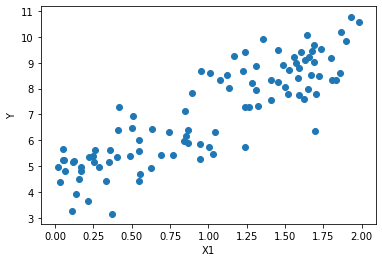

In [3]:
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("Y")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_1 +$ Gaussian noise

In [5]:
theta_best

array([[4.35056512],
       [2.71543916]])

predictions using $\hat{\theta}$

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.35056512],
       [9.78144343]])

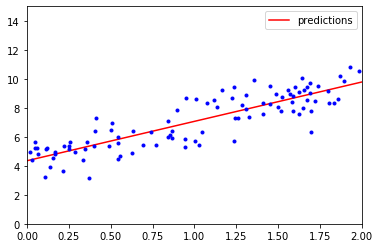

In [7]:
plt.plot(X_new, y_predict, "r-" , label='predictions')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.35056512]), array([[2.71543916]]))

The LinearRegression class is based on the *scipy.linalg.lstsq()* function (the
name stands for “least squares”), which you could call directly

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.35056512],
       [2.71543916]])

This function computes $\hat{\theta} = X^+ y$ where $X^+$ is the pseudoinverse of $X$ (specifically the
Moore-Penrose inverse).

You can use **np.linalg.pinv()** to compute the pseudoinverse directly

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.35056512],
       [2.71543916]])

The pseudoinverse itself is computed using a standard matrix factorization technique called **Singular Value Decomposition** (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \Sigma^+ V^T$ (see numpy.linalg.svd()). The pseudoinverse is computed as $X^+= V\Sigma^+U^T$. To compute the matrix $\Sigma^+$ , the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the **Normal Equation**, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

### Gradient Descent

*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector $θ$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_{j}$. In other words, you need to calculate how much the cost function will change if you change $\theta_{j}$ just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill.

*Gradient vector of the cost function:*     
$\nabla_{\theta}MSE(\theta) = \dfrac{2}{m} X^T(X\theta - y)$ 

#### Batch Gradient Descent

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.35056512],
       [2.71543916]])

#### Stochastic Gradient Descent

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.30647514],
       [2.70424181]])

In [15]:
n_epochs = 50 
t0, t1 = 5, 50

def learning_rate(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta

array([[4.37432405],
       [2.69401757]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.32828854]), array([2.71155736]))

### Polynomial Regression

In [18]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

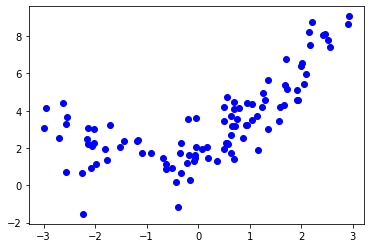

In [19]:
plt.plot(X , y, 'bo')

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([-0.33912732])

In [23]:
X_poly[0]

array([-0.33912732,  0.11500734])

X_poly now contains the original feature of X plus the square of this feature.

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93124324]), array([[1.05289417, 0.51749359]]))

### Learning rate

**learning curves**: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration).

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)

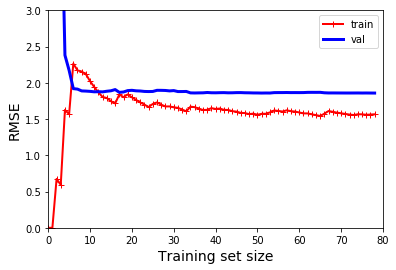

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])      
plt.legend()
plt.show()            

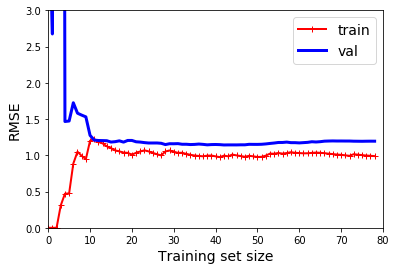

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()         

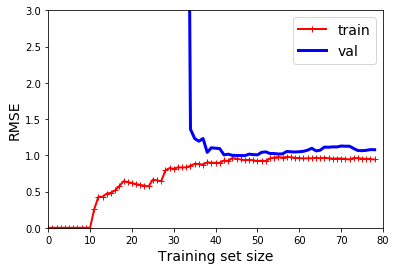

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()         

* The error on the training data is much lower than with the Linear Regression model.
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

### Regularized Linear Models

#### Ridge Regression

* half the square of the ℓ2 norm of the weight vector

$J(\mathbf{\theta}) = MSE(\mathbf{\theta})+ \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^2$

* Closed form solution:

$\mathbf{\hat{\theta} = (X^TX + \alpha A)^{-1}\ \ X^T y}$


where $A$: is the $(n + 1) × (n + 1)$ identity matrix except with a $0$ in the top-left cell, corresponding to the bias term

In [30]:
# using closed form solution

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [31]:
ridge_reg.predict([[1.5]])

array([[4.60795658]])

In [32]:
# using stochastic Gradient descent

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.58309659])

#### Lasso Regression
$Least Absolute Shrinkage and Selection Operator Regression$

* ℓ1 norm of the weight vector

$J(\mathbf{\theta}) = MSE(\mathbf{\theta})+ \alpha \frac{1}{2} \sum_{i=1}^{n} |\theta_{i}|$


An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).
In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights)

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.55655295])

#### Elastic Net


$J(\mathbf{\theta}) = MSE(\mathbf{\theta})+ r\alpha \sum_{i=1} ^{n}|\theta_{i}| + \frac{1 - r}{2} \alpha \sum_{i=1} ^{n}\theta^2$


The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression


It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [35]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.55921344])

#### Early Stopping

In [36]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [37]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [38]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [39]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [40]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

In [41]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [42]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [43]:
print(best_epoch)
print(best_model)

243
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)


## Logistic Regression


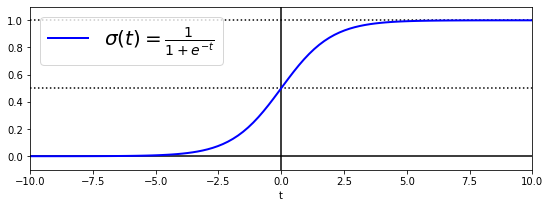

In [44]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [45]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  

In [46]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [48]:
y_proba[0]

array([9.99250016e-01, 7.49984089e-04])

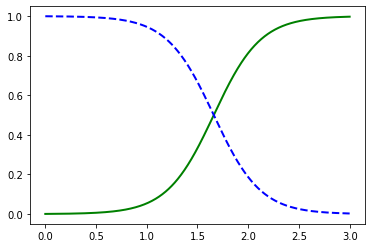

In [49]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

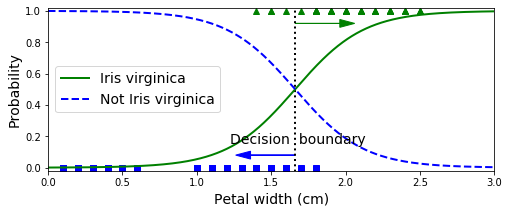

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [51]:
decision_boundary

array([1.66066066])

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [53]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
softmax_reg.predict([[5, 2]])

array([2])

In [55]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])